# Vader Sentiment Analysis

In [5]:
#pip install vaderSentiment

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [29]:
%matplotlib inline

In [16]:
analyser = SentimentIntensityAnalyzer()

In [45]:
#Function to test score for text.
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score
    #print("{:-<40} {}".format(sentence, str(score)))

In [93]:
A = "even call short notice get back quite quickly"

In [94]:
b = sentiment_analyzer_scores(A)

In [95]:
b

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [107]:
# Import Cleaned reviews
yelp = pd.read_csv('../Model/yelp_wv_model.csv')

fiq = pd.read_csv('fiq_clean_text.csv') 

In [96]:
def get_sentiment(df,col):
    scores =[]
    c_scores=[]
    cat = []
    for rev in df[col]:
        score = sentiment_analyzer_scores(rev)
        
        scores.append(score)
        
        c_scores.append(score['compound'])
        if score['compound'] >= 0.05:
            cat.append('POSITIVE')
        elif score['compound'] <= -0.05:
            cat.append('NEGATIVE')
        else:
            cat.append('NEUTRAL')
        
        
    df['Score']=scores
    df['Compound_Score'] = c_scores
    df['Sentiment'] = cat
    return df
        

In [97]:
for i,rev in enumerate(yelp.clean_answers):
    if type(rev)!= str:
        print(i,type(rev))

In [108]:
yelp = get_sentiment(yelp, 'clean_answers')

In [114]:
fiq = get_sentiment(fiq, 'Answer')

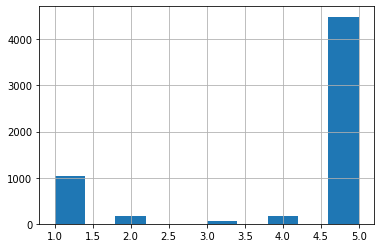

In [110]:
yelp.Ratings.hist()
#yelp.Compound_Score.hist(bins=8)

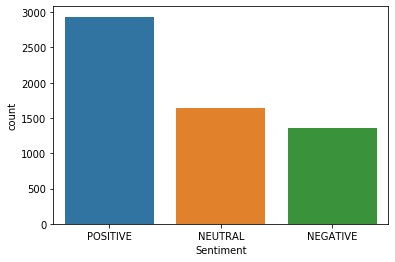

In [111]:
sns.countplot(yelp.Sentiment)

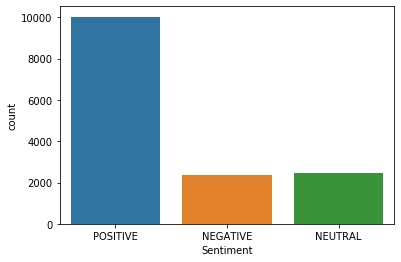

In [105]:
sns.countplot(fiq.Sentiment)

In [117]:
yelp.to_csv('yelp_vader.csv')
fiq.to_csv('fiq_vader.csv')

In [120]:
fiq

,Unnamed: 0,clinic_name,avg_clinic_score,avg_doc_score,success,income,Question,Answer,Clean_Text,Score,Compound_Score,Sentiment
0,0,Columbia University,8.3,8.4,Yes,$100K - $199K,Doctor,Dr. Rudick is very professional and knowledgea...,dr rudick professional knowledgeable never pus...,"{'neg': 0.041, 'neu': 0.843, 'pos': 0.116, 'co...",0.9256,POSITIVE
1,1,Columbia University,8.3,8.4,?,$200K - $499K,Doctor,Dr. Forman listened to my concerns and is very...,dr forman listen concern good first time ivf p...,"{'neg': 0.058, 'neu': 0.872, 'pos': 0.07, 'com...",-0.1036,NEGATIVE
2,2,Columbia University,8.3,8.4,Yes,$0 - $49K,Doctor,There aren't enough words to describe how amaz...,not not enough words describe amaze dr eric fo...,"{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compou...",0.9882,POSITIVE
3,3,Columbia University,8.3,8.4,Yes,$100K - $199K,Doctor,The level of contact and patience he had for m...,level contact patience patient go beyond docto...,"{'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'comp...",0.7880,POSITIVE
4,4,Columbia University,8.3,8.4,Yes,$100K - $199K,Doctor,"As a physician myself, I was impressed with bo...",physician impress dr brady ' clinical knowledg...,"{'neg': 0.044, 'neu': 0.842, 'pos': 0.114, 'co...",0.7581,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...
14825,14825,RMA of New Jersey,9.1,9.1,Yes,$50K - $99K,Problems,Lost appointments,lost appointment,"{'neg': 0.697, 'neu': 0.303, 'pos': 0.0, 'comp...",-0.3182,NEGATIVE
14826,14826,RMA of New Jersey,9.1,9.1,Yes,$50K - $99K,Problems,"Failed to order appropriate test, Failed to se...",fail order appropriate test fail send chart an...,"{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp...",-0.7650,NEGATIVE
14827,14827,RMA of New Jersey,9.1,9.1,No,$100K - $199K,Problems,Provided conflicting information,provide conflict information,"{'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'comp...",-0.4019,NEGATIVE
14828,14828,RMA of Philadelphia,8.5,8.5,No,$100K - $199K,Problems,Provided conflicting information,provide conflict information,"{'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'comp...",-0.4019,NEGATIVE
